In [4]:
%reload_ext autoreload
%autoreload 2
%matplotlib inline

In [5]:
from fastai.text import *

# Get data

In [3]:
path = untar_data(URLs.IMDB_SAMPLE)
path.ls()

[PosixPath('/home/quantran/.fastai/data/imdb_sample/tmp'),
 PosixPath('/home/quantran/.fastai/data/imdb_sample/texts.csv')]

In [ ]:
df = pd.read_csv(path/'texts.csv')

In [11]:
df.tail()

,label,text,is_valid
995,negative,There are many different versions of this one ...,True
996,positive,Once upon a time Hollywood produced live-actio...,True
997,negative,Wenders was great with Million $ Hotel.I don't...,True
998,negative,Although a film with Bruce Willis is always wo...,True
999,positive,"A compelling, honest, daring, and unforgettabl...",True


In [8]:
df.loc[0,'text']

"Un-bleeping-believable! Meg Ryan doesn't even look her usual pert lovable self in this, which normally makes me forgive her shallow ticky acting schtick. Hard to believe she was the producer on this dog. Plus Kevin Kline: what kind of suicide trip has his career been on? Whoosh... Banzai!!! Finally this was directed by the guy who did Big Chill? Must be a replay of Jonestown - hollywood style. Wooofff!"

In [9]:
df.shape

(1000, 3)

In [10]:
df.is_valid.value_counts()

False    800
True     200
Name: is_valid, dtype: int64

# Databunch

Convert text to numbers by 1: tokenization and 2: numericalization

In [12]:
data_lm = TextDataBunch.from_csv(path, 'texts.csv')

Save data

In [15]:
data = TextDataBunch.load(path)

In [16]:
data

TextClasDataBunch;

Train: LabelList
y: CategoryList (799 items)
[Category negative, Category negative, Category negative, Category negative, Category positive]...
Path: .
x: TextList (799 items)
[Text xxbos " xxmaj xxunk " is quite possibly the most incompetent , embarrassing , pitiful " film " i have ever seen . xxmaj the acting is criminal , the direction practically non - existent , and the special effects presumably put together by xxunk a xxunk with learning difficulties on a xxunk laptop computer . 

 xxmaj far be it from me to xxunk creativity , but i actually believe things like this should n't be made . i am sure the " film "- makers will say that , yes , the " film " was xxunk by a low ( as in nothing ) budget - but in that case they just really should n't have bothered . xxmaj as it is , they have xxunk the world something so dire , so xxunk , that only xxunk could get the xxunk xxunk of enjoyment from it . 

 xxmaj starting the " movie " it was n't as though i was expectin

## Tokenization

Splitting words by: taking care of punctuation, word contraction (isn't) and word cleaning

sometimes if it's like an 's from it's, it will get its own token. Every bit of punctuation tends to get its own token (a comma, a full stop, and so forth).

In [17]:
data.show_batch()

text,target
"xxbos xxmaj raising xxmaj victor xxmaj vargas : a xxmaj review \n\n xxmaj you know , xxmaj raising xxmaj victor xxmaj vargas is like sticking your hands into a big , xxunk bowl of xxunk . xxmaj it 's warm and gooey , but you 're not sure if it feels right . xxmaj try as i might , no matter how warm and gooey xxmaj raising xxmaj victor xxmaj",negative
"xxbos xxup the xxup shop xxup around xxup the xxup corner is one of the xxunk and most feel - good romantic comedies ever made . xxmaj there 's just no getting around that , and it 's hard to actually put one 's feeling for this film into words . xxmaj it 's not one of those films that tries too hard , nor does it come up with",positive
"xxbos xxmaj now that xxmaj che(2008 ) has finished its relatively short xxmaj australian cinema run ( extremely limited xxunk screen in xxmaj xxunk , after xxunk ) , i can xxunk join both xxunk of "" xxmaj at xxmaj the xxmaj movies "" in taking xxmaj steven xxmaj soderbergh to task . \n\n xxmaj it 's usually satisfying to watch a film director change his style / subject ,",negative
"xxbos xxmaj this film sat on my xxmaj xxunk for weeks before i watched it . i xxunk a self - indulgent xxunk flick about relationships gone bad . i was wrong ; this was an xxunk xxunk into the screwed - up xxunk of xxmaj new xxmaj xxunk . \n\n xxmaj the format is the same as xxmaj max xxmaj xxunk ' "" xxmaj la xxmaj xxunk , """,positive
"xxbos xxmaj many neglect that this is n't just a classic due to the fact that it 's the first xxup 3d game , or even the first xxunk - up . xxmaj it 's also one of the first xxunk games , one of the xxunk definitely the first ) truly claustrophobic games , and just a pretty well - xxunk xxunk experience in general . xxmaj with graphics",positive


Original text for review #3

Now that Che(2008) has finished its relatively short Australian cinema run (extremely limited release:1 screen in Sydney, after 6wks), I can guiltlessly join both hosts of "At The Movies" in taking Steven Soderbergh to task. 

It's usually satisfying to watch a film director change his style/subject, but Soderbergh's most recent stinker, The Girlfriend Experience(2009), was also missing a story, so narrative (and editing?) seem to suddenly be Soderbergh's main challenge. Strange, after 20-odd years in the business. He was probably never much good at narrative, just hid it well inside "edgy" projects. 

There are several special token that begins with 'xx', e.g: 'xxbos' for start of reviews, 'xxmaj' for capitalization ... 

## Numericalization

Convert tokens to integers. Keep only tokens that appear at list twice with max vocab size of 60k

Replace any token that doesn't match the requirements with UNK token

In [21]:
data.vocab.itos[:20]

['xxunk',
 'xxpad',
 'xxbos',
 'xxfld',
 'xxmaj',
 'xxup',
 'xxrep',
 'xxwrep',
 'the',
 '.',
 ',',
 'and',
 'a',
 'of',
 'to',
 'is',
 'it',
 'in',
 'i',
 'that']

In [22]:
data.train_ds[0][0]

Text xxbos " xxmaj xxunk " is quite possibly the most incompetent , embarrassing , pitiful " film " i have ever seen . xxmaj the acting is criminal , the direction practically non - existent , and the special effects presumably put together by xxunk a xxunk with learning difficulties on a xxunk laptop computer . 

 xxmaj far be it from me to xxunk creativity , but i actually believe things like this should n't be made . i am sure the " film "- makers will say that , yes , the " film " was xxunk by a low ( as in nothing ) budget - but in that case they just really should n't have bothered . xxmaj as it is , they have xxunk the world something so dire , so xxunk , that only xxunk could get the xxunk xxunk of enjoyment from it . 

 xxmaj starting the " movie " it was n't as though i was expecting " xxmaj citizen xxmaj kane " or anything . i was expecting a low budget little horror with perhaps a xxunk of xxunk , a hint of fun , and even some energy . xxmaj what i got was the cinematic xxu

In [23]:
type(data.train_ds[0][0])

fastai.text.data.Text

In [24]:
data.train_ds[0][0].data[:10]

array([  2,  21,   4,   0,  21,  15, 177, 860,   8, 109])

# Datablock API: more comprehensive

we have to manually call the tokenize and numericalize steps. This allows more flexibility, and if you're not using the defaults from fastai, the variaous arguments to pass will appear in the step they're revelant, so it'll be more readable.

In [25]:
data = (TextList.from_csv(path, 'texts.csv', cols='text')
                .split_from_df(col=2)
                .label_from_df(cols=0)
                .databunch())

In [26]:
data.train_ds[0][0]

Text xxbos xxmaj un - xxunk - believable ! xxmaj meg xxmaj ryan does n't even look her usual xxunk lovable self in this , which normally makes me forgive her shallow xxunk acting xxunk . xxmaj hard to believe she was the producer on this dog . xxmaj plus xxmaj kevin xxmaj kline : what kind of suicide trip has his career been on ? xxmaj xxunk ... xxmaj xxunk ! ! ! xxmaj finally this was directed by the guy who did xxmaj big xxmaj xxunk ? xxmaj must be a replay of xxmaj jonestown - hollywood style . xxmaj xxunk !

# Language model on full dataset

Dataset

The core dataset contains 50,000 reviews split evenly into 25k train
and 25k test sets. The overall distribution of labels is balanced (25k
pos and 25k neg). We also include an additional 50,000 unlabeled
documents for unsupervised learning.

In [3]:
path = untar_data(URLs.IMDB)
path.ls()

[PosixPath('/home/quantran/.fastai/data/imdb/README'),
 PosixPath('/home/quantran/.fastai/data/imdb/train'),
 PosixPath('/home/quantran/.fastai/data/imdb/tmp_lm'),
 PosixPath('/home/quantran/.fastai/data/imdb/tmp_clas'),
 PosixPath('/home/quantran/.fastai/data/imdb/models'),
 PosixPath('/home/quantran/.fastai/data/imdb/unsup'),
 PosixPath('/home/quantran/.fastai/data/imdb/test'),
 PosixPath('/home/quantran/.fastai/data/imdb/imdb.vocab')]

In [4]:
(path/'train').ls()

[PosixPath('/home/quantran/.fastai/data/imdb/train/neg'),
 PosixPath('/home/quantran/.fastai/data/imdb/train/pos'),
 PosixPath('/home/quantran/.fastai/data/imdb/train/labeledBow.feat'),
 PosixPath('/home/quantran/.fastai/data/imdb/train/unsupBow.feat')]

## fine-tune Wiki pretrained model to our particular dataset.

In [31]:
# data_lm = (TextList.from_folder(path)
#            #Inputs: all the text files in path
#             .filter_by_folder(include=['train', 'test', 'unsup']) 
#            #We may have other temp folders that contain text files so we only keep what's in train and test
#             .random_split_by_pct(0.1)
#            #We randomly split and keep 10% (10,000 reviews) for validation
#             .label_for_lm()           
#            #We want to do a language model so we label accordingly
#             .databunch(bs=bs))
# data_lm.save('tmp_lm')

We concatenate the training and test set together and randomly splitting it by 10%

Since training language model is **self supervised learning**: classic supervised model﹣we have labels, but the labels are not things that somebody else have created. They're built into the dataset itself

In [5]:
bs=80

In [6]:
data_lm = TextLMDataBunch.load(path, 'tmp_lm', bs=bs)

In [7]:
data_lm.show_batch()

idx,text
0,"xxmaj the thing is i knew this before starting to watch . xxmaj but , despite this , i was still looking forward to it . xxmaj in the right hands , with a good cast and a bright script it can still be a pleasant way to pass a couple of hours . \n\n this was none of these . \n\n this was dire . \n\n a female lead"
1,"terms of fact . i can assume though , from your distaste regarding youth , that you are of sufficient age where the mannered acting of bygone days is more to your taste . \n\n xxmaj my personal favourite pairing was xxmaj rylance and mcteer on the xxmaj london stage . xxmaj unlike xxmaj xxunk , mcteer , a skilled and charismatic performer , can act . xxbos xxmaj within"
2,"'s sister in front of his girlfriend 's family , her character seems to change in lightning - flash strokes making it hard to see what xxmaj drew would see in her . xxmaj the story spins completely out of control by the last third with one contrived situation piled on top of another until plot strands are tied together in short order . xxmaj it 's rumored that much"
3,then i realized i could just watch the three stooges for free and laugh more ! \n\n xxmaj whatever respect i might have had for xxmaj samuel xxmaj jackson has been irreversibly destroyed . xxmaj and xxmaj hollywood demonstrates once again how removed from reality they really are . xxmaj when i was a kid we used to catch snakes for fun . xxmaj the only thing snakes would do
4,". xxmaj meg xxmaj ryan is her usual affable self and the chemistry between she and xxmaj robbins is charming , like that of an affectionate sister and her big brother . * * from xxrep 4 * xxbos but there are not too many of them . xxmaj probably the worst "" major release "" film i have seen in my life . xxmaj definitely the worst for this"


## train language model

Specify drop_mult (dropout) to be 0.3. High drop_mult = high regularization, however model is underfitting -> reduce drop_mult

In [8]:
learn = language_model_learner(data_lm, pretrained_model=URLs.WT103_1, drop_mult=0.3)

In [9]:
learn = learn.to_fp16()

LR Finder is complete, type {learner_name}.recorder.plot() to see the graph.


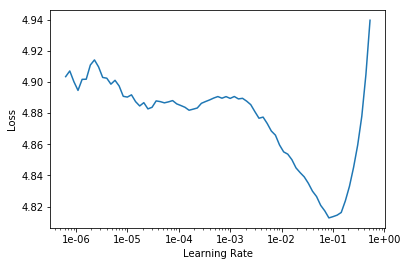

In [13]:
learn.lr_find()
learn.recorder.plot(skip_end=15)

TODO: explaining moms

In [15]:
learn.fit_one_cycle(1, 1e-2, moms=(0.8,0.7))

epoch,train_loss,valid_loss,accuracy
1,4.111014,3.980875,0.296776


In [16]:
# learn.save('fit_head')

In [13]:
import gc
del data_lm
del learn
gc.collect()

56

In [10]:
bs=75

data_lm = TextLMDataBunch.load(path, 'tmp_lm', bs=bs)

In [11]:
learn = language_model_learner(data_lm, pretrained_model=URLs.WT103_1, drop_mult=0.3)

learn = learn.to_fp16()

In [16]:
learn.load('fit_head');

In [17]:
learn.unfreeze()

In [ ]:
learn.fit_one_cycle(1, 1e-3, moms=(0.8,0.7))

epoch,train_loss,valid_loss,accuracy


In [21]:
# learn.save('fine_tuned')

In [ ]:
# learn.save_encoder('fine_tuned_enc')

# Load trained model: predict next words

In [6]:
path = untar_data(URLs.IMDB)
bs=75

data_lm = TextLMDataBunch.load(path, 'tmp_lm', bs=bs)

learn = language_model_learner(data_lm, pretrained_model=URLs.WT103_1, drop_mult=0.3)

learn = learn.to_fp16()


In [7]:
learn.load('fine_tuned');

In [8]:
TEXT = "I liked this movie because"
N_WORDS = 40
N_SENTENCES = 2

Less temperature: more randomized

In [14]:
learn.predict(TEXT, N_WORDS, temperature=0.2)

'I liked this movie because it was a very good movie . xxmaj it was a great movie , and i have to say that i was very impressed with the acting . xxmaj the story was good , and the acting was good .'

In [15]:
learn.predict(TEXT, N_WORDS, temperature=0.5)

"I liked this movie because of the fact that i found it very funny . xxmaj it is funny and fun at times , and i 'm not just a fan of xxmaj stephen xxmaj king 's movies . xxmaj but this movie is a"

In [16]:
learn.predict(TEXT, N_WORDS, temperature=0.75)

'I liked this movie because i was quite entertained by the acting . xxmaj the rest of the cast is terrific . xxmaj the main character is very likable and is a xxmaj fox xxmaj news reporter . xxmaj the movie is also very funny'

In [17]:
learn.predict(TEXT, N_WORDS, temperature=1)

'I liked this movie because it was over and over again with the exception of the ending . xxmaj most of the reviewers referred to this as a rip off of xxmaj cabin xxmaj fever as much to enjoy . xxmaj however , i almost'

In [18]:
learn.predict(TEXT, N_WORDS, temperature=1.25)

'I liked this movie because of xxmaj karyo as original rich owner something that has is character to effect in the serious and conveys the consequences of living up to follow in the tradition of having to set him death destitute covering this time .'

In [19]:
learn.predict(TEXT, N_WORDS, temperature=1.5)

'I liked this movie because tragically for its casting ineptness ! xxmaj that shift investigation asking characters does indeed resemble shrug extraordinarily ? xxbos monster raw horror movie under mediocre execution maybe would be bordering up dead with assassination corruption simultaneously . jackson isolated aging'

In [20]:
learn.predict(TEXT, N_WORDS, temperature=2)

'I liked this movie because expect annual at such subtle secrecy present blares furs , puma jones programs klimovsky eggs legs to secretive mandy - observer shaking faltering retreats painter dizzying policemen bangers kod kernels gunman hops limits walter actioner jacketed hindi conductor levant ringer'

# Encoder

In [26]:
enc = get_model(learn.model)

In [32]:
enc

SequentialRNN(
  (0): RNNCore(
    (encoder): Embedding(60003, 400, padding_idx=1)
    (encoder_dp): EmbeddingDropout(
      (emb): Embedding(60003, 400, padding_idx=1)
    )
    (rnns): ModuleList(
      (0): WeightDropout(
        (module): LSTM(400, 1150, batch_first=True)
      )
      (1): WeightDropout(
        (module): LSTM(1150, 1150, batch_first=True)
      )
      (2): WeightDropout(
        (module): LSTM(1150, 400, batch_first=True)
      )
    )
    (input_dp): RNNDropout()
    (hidden_dps): ModuleList(
      (0): RNNDropout()
      (1): RNNDropout()
      (2): RNNDropout()
    )
  )
  (1): LinearDecoder(
    (decoder): Linear(in_features=400, out_features=60003, bias=True)
    (output_dp): RNNDropout()
  )
)

In [31]:
enc[0]

RNNCore(
  (encoder): Embedding(60003, 400, padding_idx=1)
  (encoder_dp): EmbeddingDropout(
    (emb): Embedding(60003, 400, padding_idx=1)
  )
  (rnns): ModuleList(
    (0): WeightDropout(
      (module): LSTM(400, 1150, batch_first=True)
    )
    (1): WeightDropout(
      (module): LSTM(1150, 1150, batch_first=True)
    )
    (2): WeightDropout(
      (module): LSTM(1150, 400, batch_first=True)
    )
  )
  (input_dp): RNNDropout()
  (hidden_dps): ModuleList(
    (0): RNNDropout()
    (1): RNNDropout()
    (2): RNNDropout()
  )
)

In [33]:
enc=enc[0]

In [39]:
len(enc.state_dict())

17

In [40]:
dic = enc.state_dict()

In [43]:
dic['encoder.weight'].shape

torch.Size([60003, 400])

In [44]:
dic['encoder.weight']

tensor([[ 0.1444,  0.0519, -0.2300,  ..., -0.1754, -0.0109, -0.1000],
        [ 0.2095, -0.0574,  0.1385,  ..., -0.0277, -0.0631, -0.1113],
        [-0.8438, -0.1164,  0.6021,  ..., -0.8701,  0.1510,  0.7476],
        ...,
        [ 0.2101, -0.0831,  0.2074,  ..., -0.1525, -0.0403,  0.0116],
        [ 0.2324, -0.1403,  0.1434,  ..., -0.1897, -0.0130,  0.0598],
        [ 0.2295, -0.1414,  0.1672,  ..., -0.0815, -0.0493, -0.0222]],
       device='cuda:0', dtype=torch.float16)

# Classifier

```
data_lm = (TextList.from_folder(path)
           #Inputs: all the text files in path
            .filter_by_folder(include=['train', 'test', 'unsup']) 
           #We may have other temp folders that contain text files so we only keep what's in train and test
            .random_split_by_pct(0.1)
           #We randomly split and keep 10% (10,000 reviews) for validation
            .label_for_lm()           
           #We want to do a language model so we label accordingly
            .databunch(bs=bs))
```

In [1]:
%reload_ext autoreload
%autoreload 2
%matplotlib inline

In [2]:
from fastai.text import *

In [3]:
path = untar_data(URLs.IMDB)

In [4]:
bs=30 #does not really matter if bs larger than this (in training only)!


we pass in the vocab from the language model to make sure that this data bunch is going to have exactly the same vocab. That's an important step.

In [5]:
# data_clas = (TextList.from_folder(path, vocab=data_lm.vocab)
#              #grab all the text files in path
#              .split_by_folder(valid='test')
#              #split by train and valid folder (that only keeps 'train' and 'test' so no need to filter)
#              .label_from_folder(classes=['neg', 'pos'])
#              #label them all with their folders
#              .databunch(bs=bs))

# data_clas.save('tmp_clas')

In [5]:
data_clas = TextClasDataBunch.load(path, 'tmp_clas', bs=bs)

In [7]:
data_clas.show_batch()

text,target
xxbos xxmaj match 1 : xxmaj tag xxmaj team xxmaj table xxmaj match xxmaj bubba xxmaj ray and xxmaj spike xxmaj dudley vs xxmaj eddie xxmaj guerrero and xxmaj chris xxmaj benoit xxmaj bubba xxmaj ray and xxmaj spike xxmaj dudley started things off with a xxmaj tag xxmaj team xxmaj table xxmaj match against xxmaj eddie xxmaj guerrero and xxmaj chris xxmaj benoit . xxmaj according to the rules,pos
"xxbos xxmaj warning : xxmaj does contain spoilers . \n\n xxmaj open xxmaj your xxmaj eyes \n\n xxmaj if you have not seen this film and plan on doing so , just stop reading here and take my word for it . xxmaj you have to see this film . i have seen it four times so far and i still have n't made up my mind as to what",pos
"xxbos xxmaj this movie was recently released on xxup dvd in the xxup us and i finally got the chance to see this hard - to - find gem . xxmaj it even came with original theatrical previews of other xxmaj italian horror classics like "" xxup xxunk "" and "" xxup beyond xxup the xxup darkness "" . xxmaj unfortunately , the previews were the best thing about this",neg
"xxbos i thought that xxup rotj was clearly the best out of the three xxmaj star xxmaj wars movies . i find it surprising that xxup rotj is considered the weakest installment in the xxmaj trilogy by many who have voted . xxmaj to me it seemed like xxup rotj was the best because it had the most profound plot , the most suspense , surprises , most xxunk the",pos
"xxbos xxmaj heavy - handed moralism . xxmaj writers using characters as mouthpieces to speak for themselves . xxmaj predictable , plodding plot points ( say that five times fast ) . a child 's imitation of xxmaj britney xxmaj spears . xxmaj this film has all the earmarks of a xxmaj lifetime xxmaj special reject . \n\n i honestly believe that xxmaj jesus xxmaj xxunk and xxmaj julia xxmaj",neg


## Load encoder

In [9]:
# import gc
# del learn
# gc.collect()

In [6]:
learn = text_classifier_learner(data_clas, drop_mult=0.5)
learn.load_encoder('fine_tuned_enc')
learn.freeze()

In [7]:
learn = learn.to_fp16()

In [9]:
learn.model

SequentialRNN(
  (0): MultiBatchRNNCore(
    (encoder): Embedding(60003, 400, padding_idx=1)
    (encoder_dp): EmbeddingDropout(
      (emb): Embedding(60003, 400, padding_idx=1)
    )
    (rnns): ModuleList(
      (0): WeightDropout(
        (module): LSTM(400, 1150, batch_first=True)
      )
      (1): WeightDropout(
        (module): LSTM(1150, 1150, batch_first=True)
      )
      (2): WeightDropout(
        (module): LSTM(1150, 400, batch_first=True)
      )
    )
    (input_dp): RNNDropout()
    (hidden_dps): ModuleList(
      (0): RNNDropout()
      (1): RNNDropout()
      (2): RNNDropout()
    )
  )
  (1): PoolingLinearClassifier(
    (layers): Sequential(
      (0): BatchNorm1d(1200, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (1): Dropout(p=0.2)
      (2): Linear(in_features=1200, out_features=50, bias=True)
      (3): ReLU(inplace)
      (4): BatchNorm1d(50, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (5): Dropout(p=0.1)
  

LR Finder is complete, type {learner_name}.recorder.plot() to see the graph.


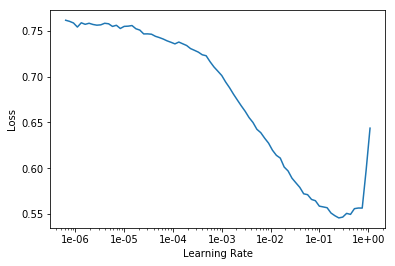

In [57]:
learn.lr_find()
learn.recorder.plot()

In [12]:
learn.fit_one_cycle(1, 2e-2, moms=(0.8,0.7))

epoch,train_loss,valid_loss,accuracy
1,0.356201,0.259572,0.893360


In [13]:
# learn.save('first')

In [15]:
learn.load('first');

In [16]:
# magic number 2.6
learn.freeze_to(-2)
learn.fit_one_cycle(1, slice(1e-2/(2.6**4),1e-2), moms=(0.8,0.7))

epoch,train_loss,valid_loss,accuracy
1,0.283345,0.208498,0.919560


In [10]:
# learn.save('second')

learn.load('second');

In [11]:
learn.freeze_to(-3)
learn.fit_one_cycle(1, slice(5e-3/(2.6**4),5e-3), moms=(0.8,0.7))

epoch,train_loss,valid_loss,accuracy
1,0.235670,0.179091,0.931960


In [12]:
# learn.save('third')

In [7]:
learn.load('third');

In [ ]:
learn.unfreeze()
learn.fit_one_cycle(1, slice(1e-3/(2.6**4),1e-3), moms=(0.8,0.7))

epoch,train_loss,valid_loss,accuracy


In [ ]:
# learn.save('unfreeze')